<a href="https://colab.research.google.com/github/nwokochachijiokeronald/CE888/blob/main/cn_lab6_task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all needed libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import cluster, metrics
warnings.filterwarnings('ignore')

In [ ]:
#Loading data 
df_country = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv",delimiter=",")
df_dictonary = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv")

In [ ]:
# Exploring dataset 
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df_country.shape

(167, 10)

In [ ]:
df_country.columns.values 

array(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype=object)

In [ ]:
print(df_dictonary)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Checking for unique variable
df_country.nunique(axis=0) 

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [ ]:
# Dropping the Country variable
df_country = df_country.drop(['country'], axis=1)
df_country.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Performing sumary statistics
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Text(0, 0.5, 'Income')

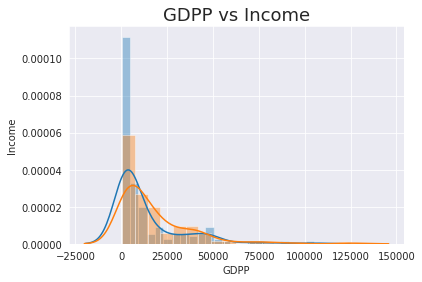

In [ ]:
# Plotting Gdpp versus Net income as a measure for development
sns.set_style('darkgrid')
plt.title("GDPP vs Income", fontsize=18)
sns.distplot(df_country['gdpp'])
sns.distplot(df_country['income'])
plt.xlabel("GDPP")
plt.ylabel("Income")

Text(0, 0.5, 'Import')

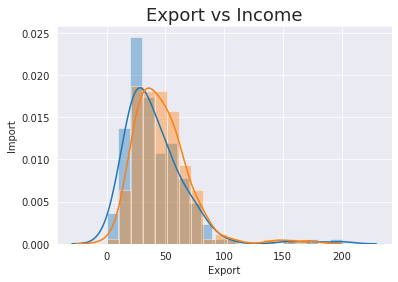

In [ ]:
# Plotting Export versus Import as a measure for development
sns.set_style('darkgrid')
plt.title("Export vs Income", fontsize=18)
sns.distplot(df_country['exports'])
sns.distplot(df_country['imports'])
plt.xlabel("Export")
plt.ylabel("Import")

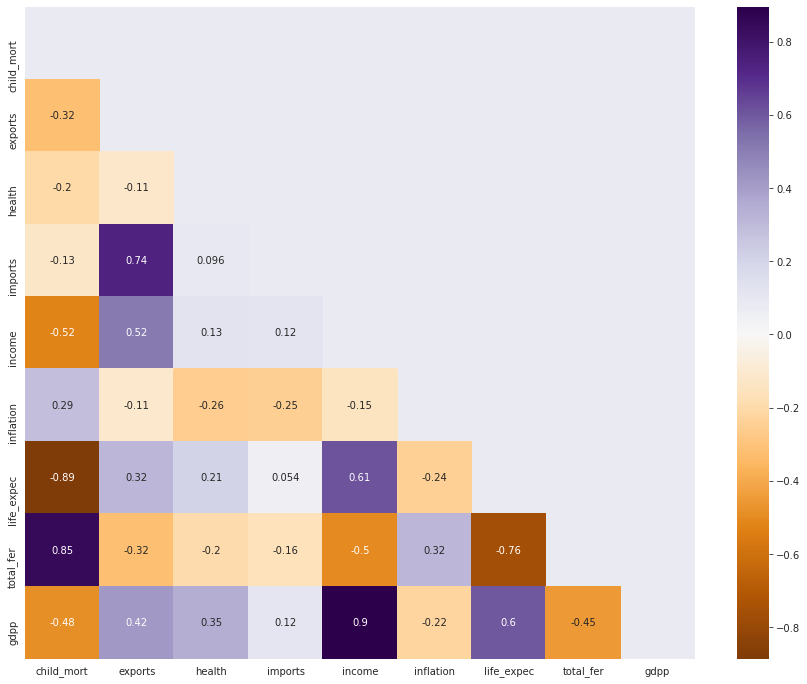

In [ ]:
# Correlation matrix and Heat map 
corr_matrix = df_country.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, mask =mask,cmap='PuOr',annot = True)

In [ ]:
# Performinng clustering using K-Means
kmean = cluster.KMeans(n_clusters=3).fit(df_country)
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Text(0, 0.5, 'Income')

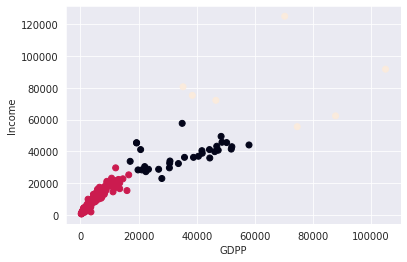

In [ ]:
# Plotting the newly generated KMeans Gdpp versus Net income using scatter diagram
plt.scatter(df_country['gdpp'],df_country['income'],c= kmean.labels_)
plt.xlabel("GDPP")
plt.ylabel("Income")

Text(0, 0.5, 'Imports')

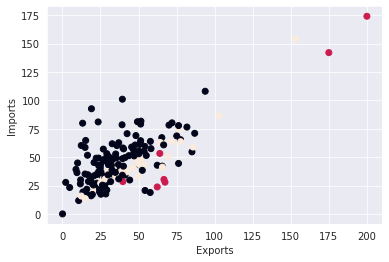

In [ ]:
# Plotting the newly generated KMeans Gdpp versus Net income using scatter diagram
plt.scatter(df_country['exports'],df_country['imports'],c= km.labels_)
plt.xlabel("Exports")
plt.ylabel("Imports")

In [ ]:
# Predicting the levels of development of countries using the cluster 
df_country_under = []
df_country_developing = []
df_country_developed = []
for i in range(len(kmean.labels_)):
  if kmean.labels_[i] == 0:
    df_country_under.append(y[i])
  elif kmean.labels_[i] == 1:
    df_country_developing.append(y[i])
  else:
    df_country_developed.append(y[i])


print('Under Developed Countries', df_country_under)
print()
print('Developing Countries', df_country_developing)
print()
print('Developed Countries', df_country_developed)

Under Developed Countries ['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Malta', 'Netherlands', 'New Zealand', 'Oman', 'Portugal', 'Saudi Arabia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom', 'United States']

Developing Countries ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 

In [ ]:
# Improving features extraction with PCA  
pca = PCA(n_components=3)
pca = pca.fit_transform(df_country)

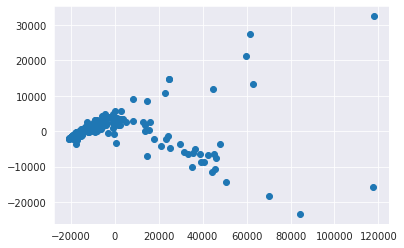

In [ ]:
# Plotting the generated graph using scatter plot
plt.scatter(pca[:,0],pca[:,1])

In [ ]:
# Performinng clustering using K-Means for the newly generated PCA features
kmean_pca = cluster.KMeans(n_clusters=3).fit(pca)
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

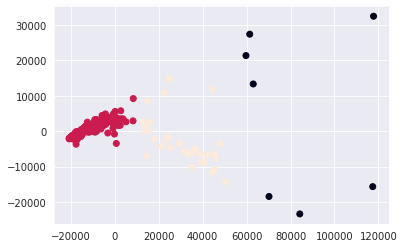

In [ ]:
# Plotting the generated clusters againnst PCA components using scatter plot
plt.scatter(pca[:,0],pca[:,1],c=kmean_pca.labels_ )

In [ ]:
# Assigning countries based on generated clusters 
Under_dev_country = []
developing_country = []
developed_country = []
for i in range(len(km_pca.labels_)):
  if km_pca.labels_[i] == 0:
    Under_dev_country.append(y[i])
  elif km_pca.labels_[i] == 1:
    developing_country.append(y[i])
  else:
    developed_country.append(y[i])

In [ ]:
# Predicting the levels of development of countries using the clustered PCA
df_country_under = []
df_country_developing = []
df_country_developed = []
for i in range(len(kmean_pca.labels_)):
  if kmean_pca.labels_[i] == 0:
    df_country_under.append(y[i])
  elif kmean_pca.labels_[i] == 1:
    df_country_developing.append(y[i])
  else:
    df_country_developed.append(y[i])


print('Under Developed Countries', df_country_under)
print()
print('Developing Countries', df_country_developing)
print()
print('Developed Countries', df_country_developed)

Under Developed Countries ['Brunei', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar', 'Singapore', 'Switzerland']

Developing Countries ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, F